In [7]:
!pip install scikit-learn pandas

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


Experiment A
Accuracy: 0.8009950248756219
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       130
           1       0.79      0.59      0.68        71

    accuracy                           0.80       201
   macro avg       0.80      0.75      0.77       201
weighted avg       0.80      0.80      0.79       201



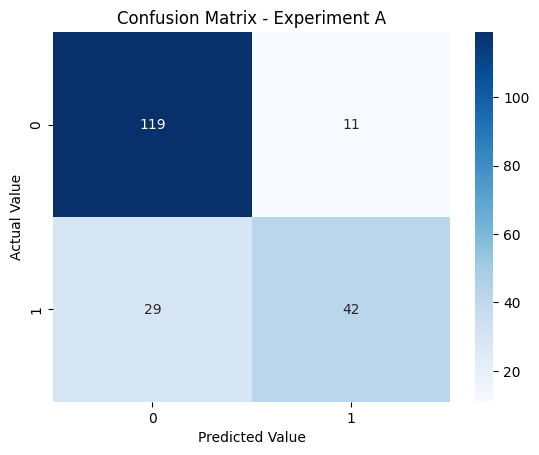


Feature Importances:
Glucose                     0.249978
BMI                         0.162415
Age                         0.132457
DiabetesPedigreeFunction    0.125463
BloodPressure               0.092505
Pregnancies                 0.082628
Insulin                     0.079097
SkinThickness               0.075457
dtype: float64


<ipython-input-6-757ce35e88d6>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


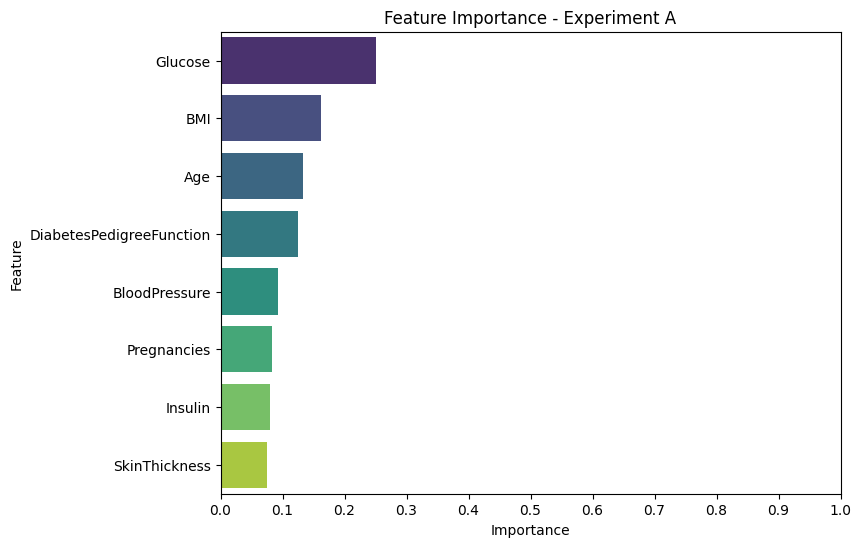


Experiment B
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00       231

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668



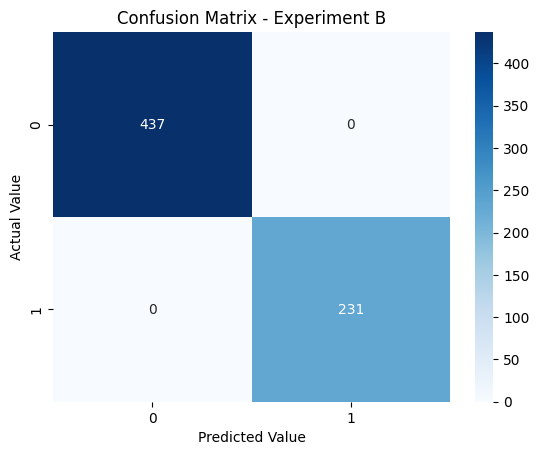


Feature Importances:
Glucose                     0.262064
BMI                         0.165291
Age                         0.129765
DiabetesPedigreeFunction    0.122202
BloodPressure               0.092507
Pregnancies                 0.085300
Insulin                     0.072239
SkinThickness               0.070631
dtype: float64


<ipython-input-6-757ce35e88d6>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


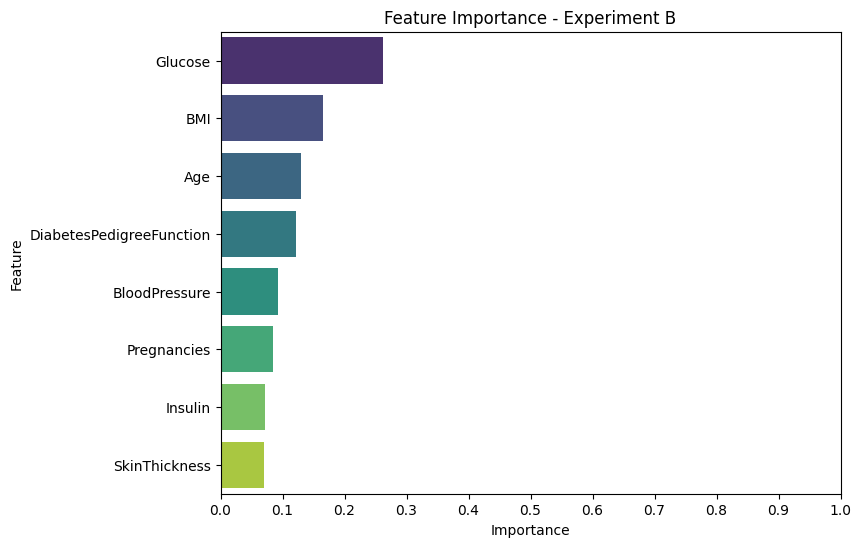

In [6]:
import matplotlib.pyplot as plt

def run_experiment(train_path, test_path, experiment_name):
    print(f"\nExperiment {experiment_name}")

    # 讀取資料
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # 切分 X 和 y
    X_train = train_df.drop("Outcome", axis=1)
    y_train = train_df["Outcome"]
    X_test = test_df.drop("Outcome", axis=1)
    y_test = test_df["Outcome"]

    # 訓練模型
    model = RandomForestClassifier(random_state=79)
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # confusion matrix 視覺化
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Experiment {experiment_name}")
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

    # 特徵重要性分析 + 視覺化
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feature_importances = feature_importances.sort_values(ascending=False)
    print("\nFeature Importances:")
    # print(feature_importances)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title(f"Feature Importance - Experiment {experiment_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.xlim(0, 1)
    plt.xticks([i/10 for i in range(11)])

    plt.show()




# 執行實驗 A 和 B
run_experiment("/content/drive/My Drive/train_data_A.csv", "/content/drive/My Drive/test_data_A.csv", "A")
run_experiment("/content/drive/My Drive/train_data_B.csv", "/content/drive/My Drive/train_data_B.csv", "B")